### boxplot for the clustering 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data CSV file 

df_2GMM=pd.read_csv('/rds/general/user/hg1222/home/Group5/Clustering_temp/Train 2GMM.csv', header=0, index_col=0)

In [4]:
df_6Kmeans=pd.read_csv('/rds/general/user/hg1222/home/Group5/Clustering_temp/Train 6Kmeans.csv', header=0, index_col=0)

In [5]:
df_7Kmeans=pd.read_csv('/rds/general/user/hg1222/home/Group5/Clustering_temp/Train 7Kmeans.csv', header=0, index_col=0)

In [6]:
df_3Kmeans=pd.read_csv('/rds/general/user/hg1222/home/Group5/Clustering_temp/Train 3Kmeans.csv', header=0, index_col=0)

In [6]:
print(df_2GMM)

                      Monocyte_count.0.0  Reti_count.0.0  WBC_count.0.0  \
Lymphocyte_count.0.0                                                      
 0.113554                       0.001141        0.314987       0.212246   
 1.416143                      -0.100397       -0.514203       1.424125   
-0.084666                      -0.100397        0.149149      -0.301262   
 0.396725                       0.102678        0.220222       1.095480   
 1.359509                       0.051910       -0.490512       1.105750   
...                                  ...             ...            ...   
-0.214925                      -0.120704       -0.229910      -0.658663   
 0.215496                      -0.029320       -0.514203       0.150625   
 0.028602                       0.183909        0.480825      -0.023967   
-0.554731                      -0.425317       -0.632659      -0.225262   
-0.064844                      -0.141012       -0.135145      -0.317694   

                      RB

In [7]:
import seaborn as sns

In [8]:
print(df_2GMM.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14577 entries, 0.1135830654050993 to 0.2240942282790519
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monocyte_count.0.0                 14577 non-null  float64
 1   Reti_count.0.0                     14577 non-null  float64
 2   WBC_count.0.0                      14577 non-null  float64
 3   RBC_count.0.0                      14577 non-null  float64
 4   Hgb_conc.0.0                       14577 non-null  float64
 5   Haematocrit_perc.0.0               14577 non-null  float64
 6   Platelet_count.0.0                 14577 non-null  float64
 7   Basophil_count.0.0                 14577 non-null  float64
 8   Eosinophil_count.0.0               14577 non-null  float64
 9   Neutrophil_count.0.0               14577 non-null  float64
 10  Immature_ret_fraction.0.0          14577 non-null  float64
 11  High_light_scatter_ret

In [9]:
df_2GMM = df_2GMM.astype(float)

In [10]:
# create melted dataframe for box plot
data_melted_2gmm=df_2GMM.melt(id_vars='cluster_ncomponents', var_name='column_name', value_name='value')

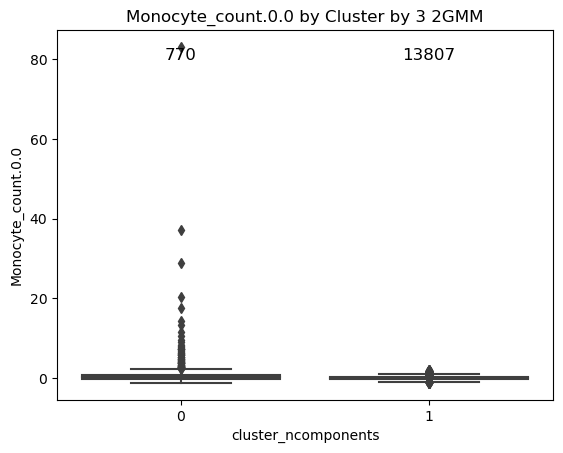

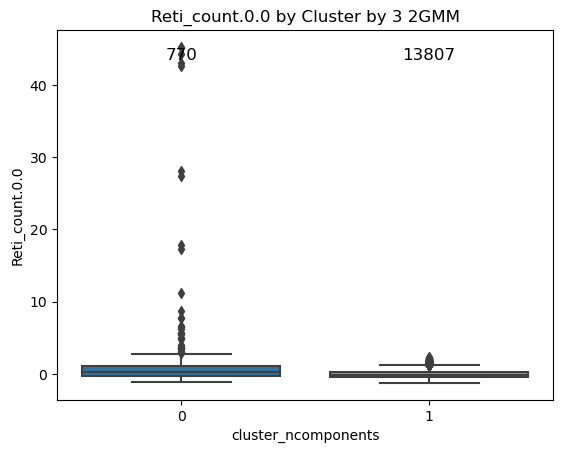

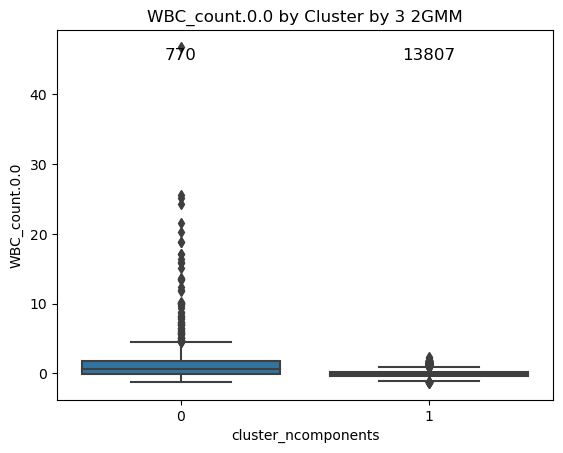

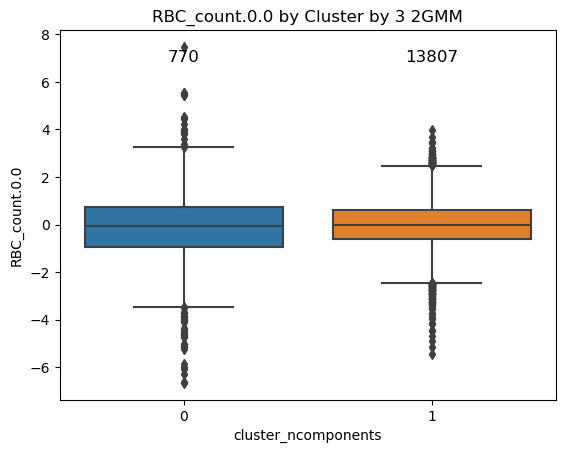

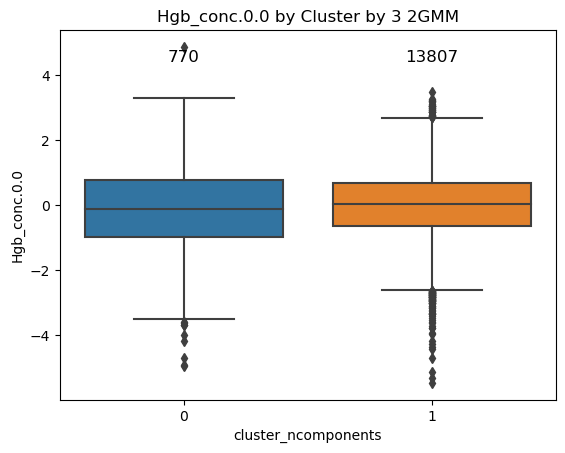

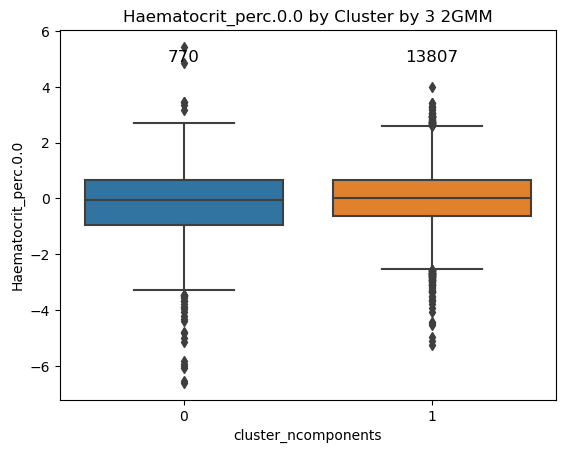

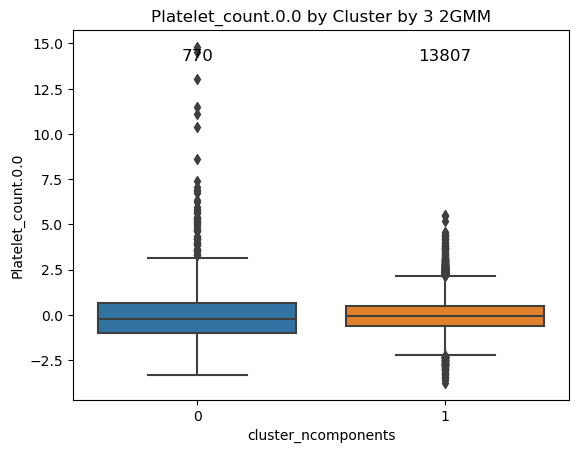

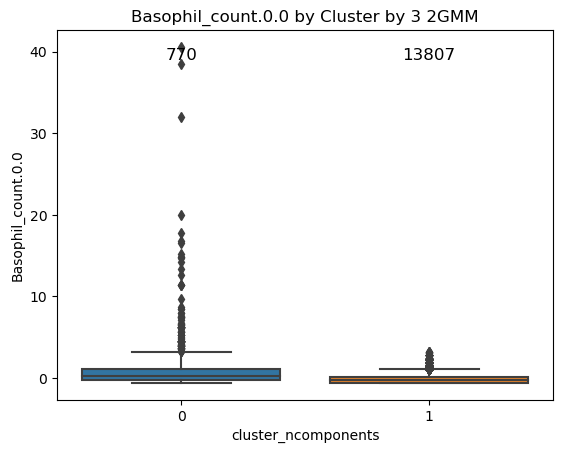

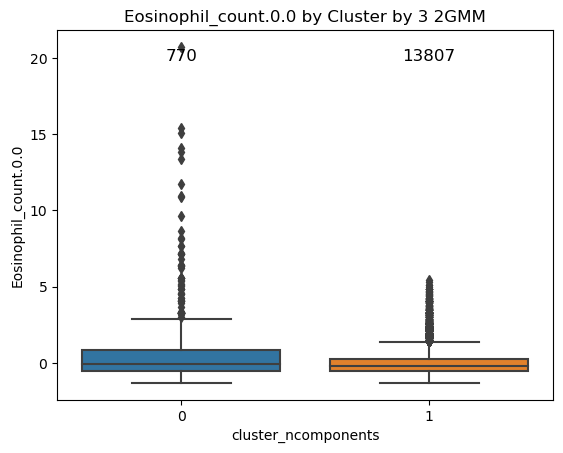

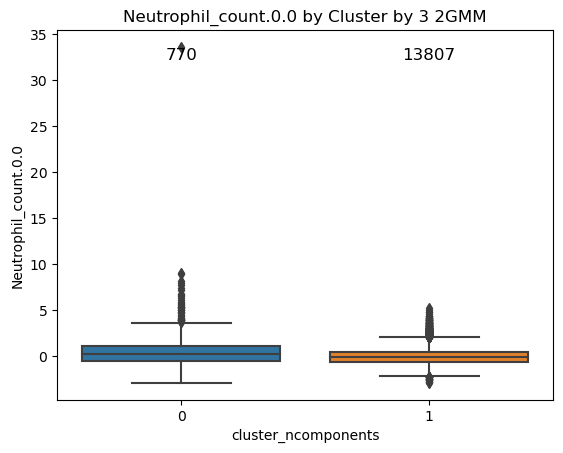

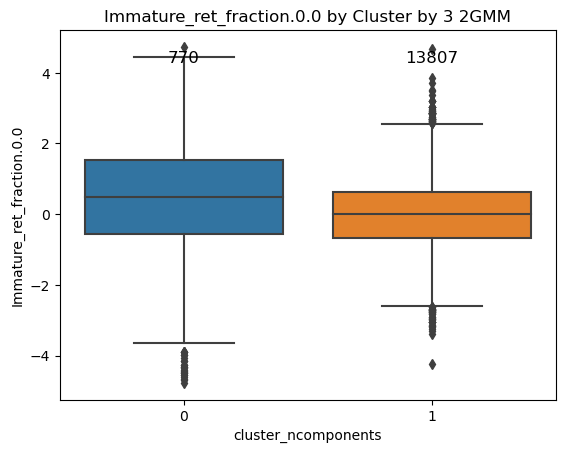

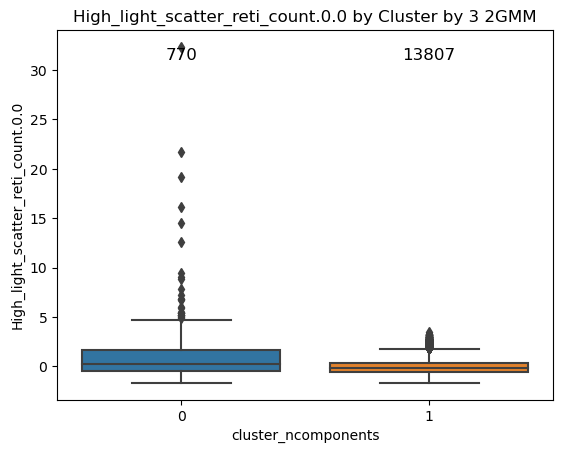

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# list of columns to create box plots for
columns = ['Monocyte_count.0.0', 'Reti_count.0.0', 'WBC_count.0.0', 'RBC_count.0.0', 'Hgb_conc.0.0',
           'Haematocrit_perc.0.0', 'Platelet_count.0.0', 'Basophil_count.0.0', 'Eosinophil_count.0.0',
           'Neutrophil_count.0.0', 'Immature_ret_fraction.0.0', 'High_light_scatter_reti_count.0.0']

# loop through each column and create a box plot with total counts
for col in columns:
    # create the box plot
    sns.boxplot(x='cluster_ncomponents', y=col, data=df_2GMM)
    plt.title(f"{col} by Cluster by 3 2GMM")

    # get the counts for each cluster
    counts = df_2GMM.groupby('cluster_ncomponents').size().reset_index(name='counts')

    # annotate the plot with the counts
    for i, row in counts.iterrows():
        plt.text(row['cluster_ncomponents'], df_2GMM[col].max() - 0.1, f"{row['counts']}", 
                 fontsize=12, color='black', ha='center', va='top')

    # show the plot
    plt.show()

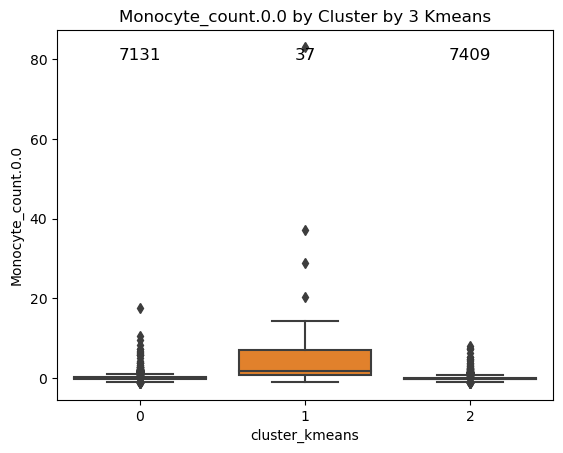

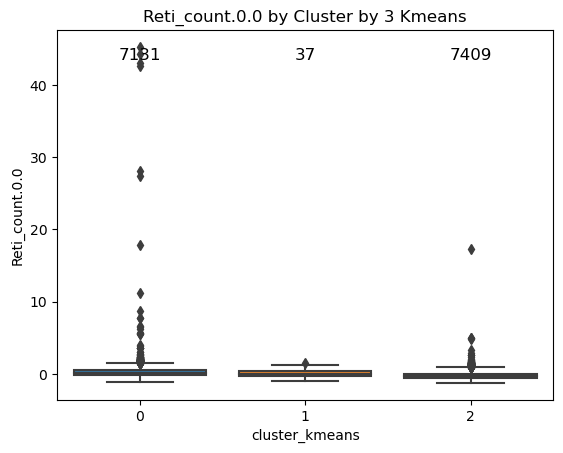

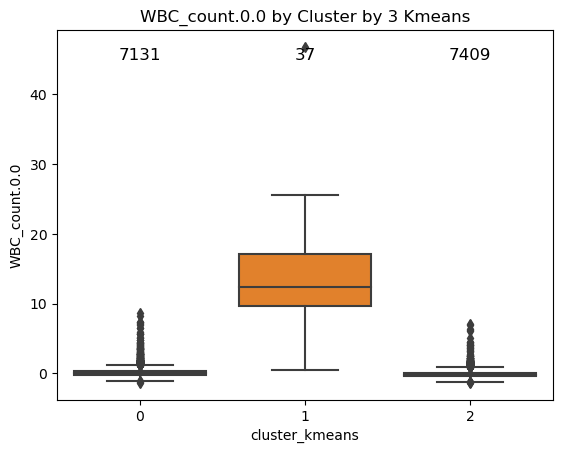

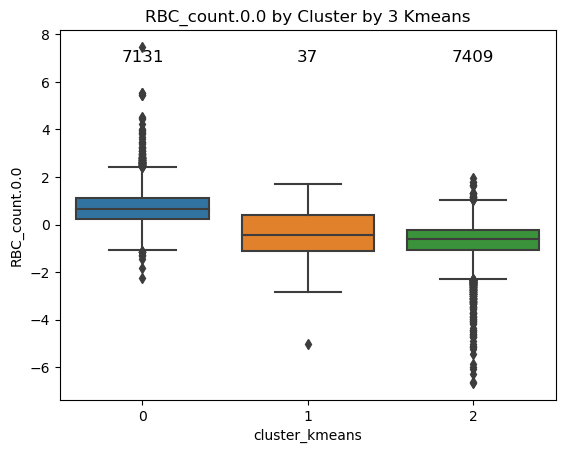

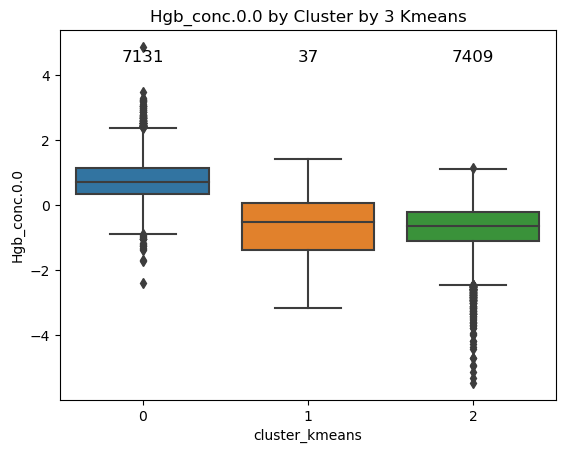

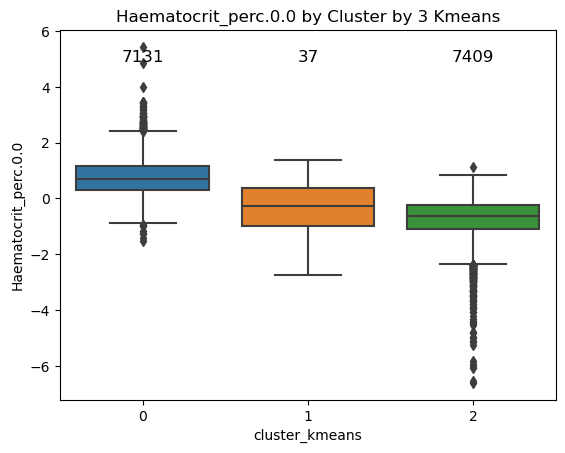

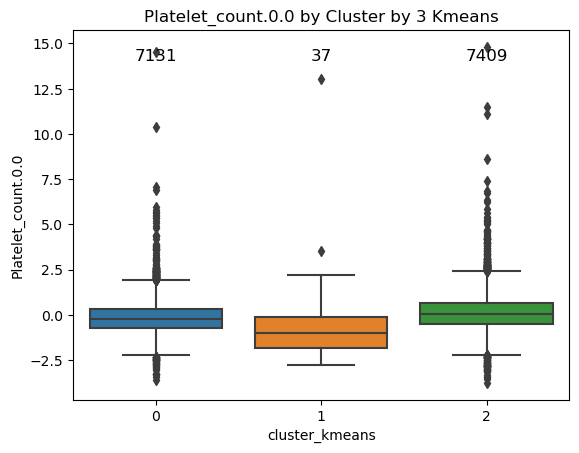

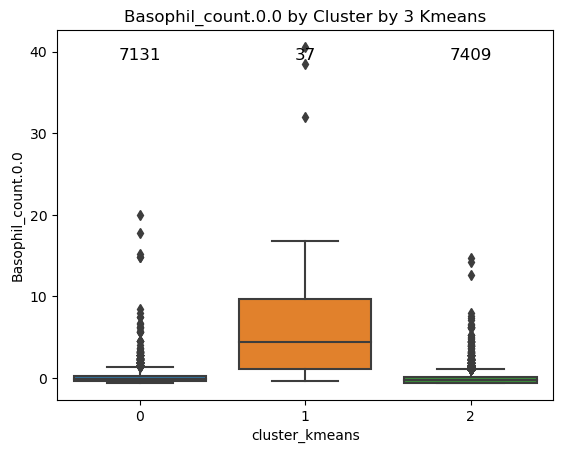

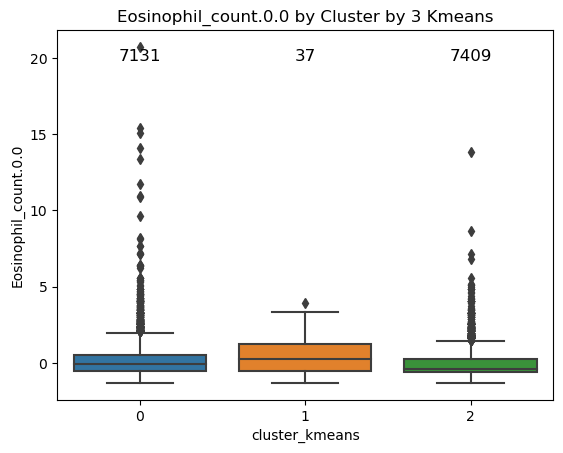

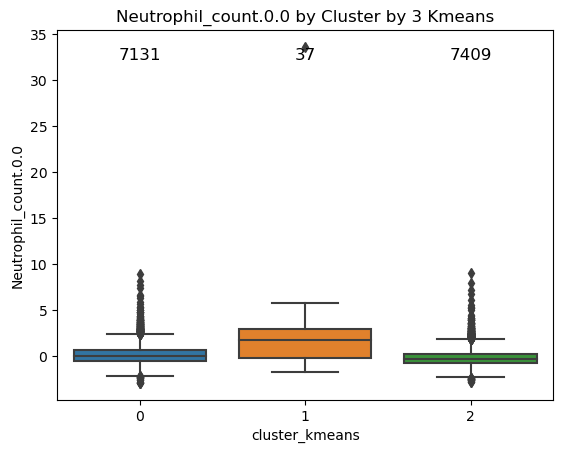

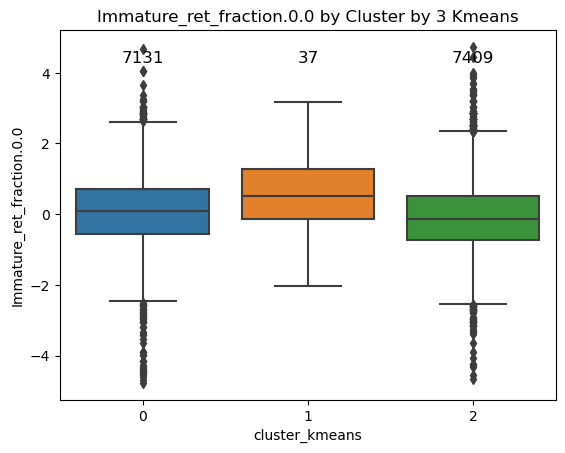

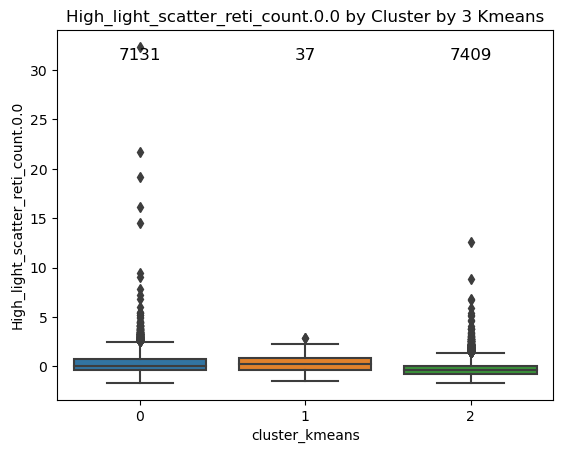

In [18]:
# list of columns to create box plots for
columns = ['Monocyte_count.0.0', 'Reti_count.0.0', 'WBC_count.0.0', 'RBC_count.0.0', 'Hgb_conc.0.0',
           'Haematocrit_perc.0.0', 'Platelet_count.0.0', 'Basophil_count.0.0', 'Eosinophil_count.0.0',
           'Neutrophil_count.0.0', 'Immature_ret_fraction.0.0', 'High_light_scatter_reti_count.0.0']

# loop through each column and create a box plot with total counts
for col in columns:
    # create the box plot
    sns.boxplot(x='cluster_kmeans', y=col, data=df_3Kmeans)
    plt.title(f"{col} by Cluster by 3 Kmeans")

    # get the counts for each cluster
    counts = df_3Kmeans.groupby('cluster_kmeans').size().reset_index(name='counts')

    # annotate the plot with the counts
    for i, row in counts.iterrows():
        plt.text(row['cluster_kmeans'], df_3Kmeans[col].max() - 0.1, f"{row['counts']}", 
                 fontsize=12, color='black', ha='center', va='top')

    # show the plot
    plt.show()


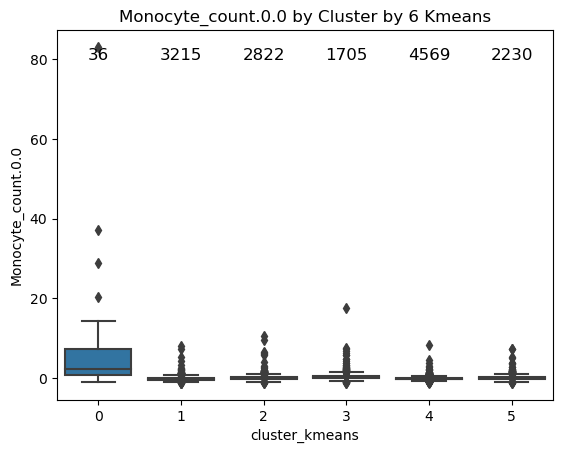

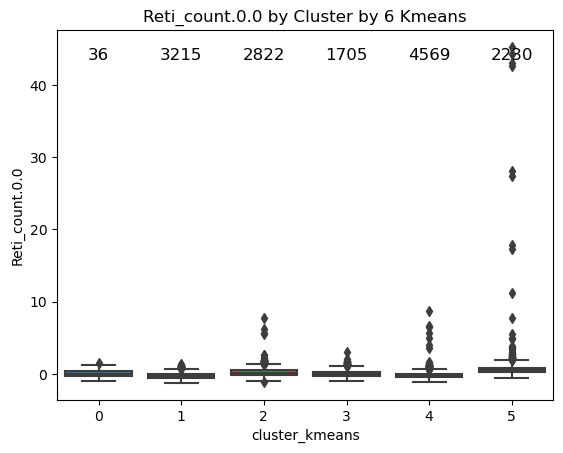

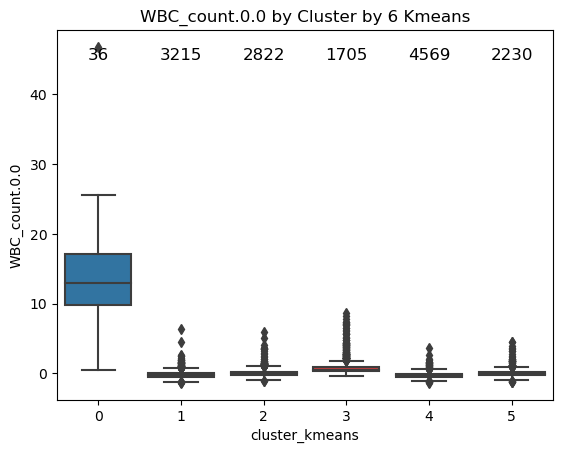

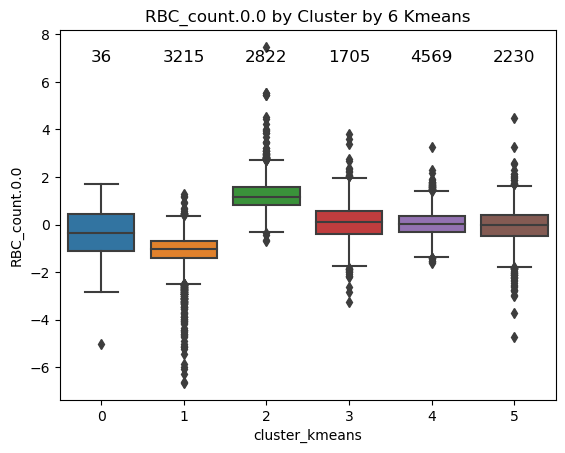

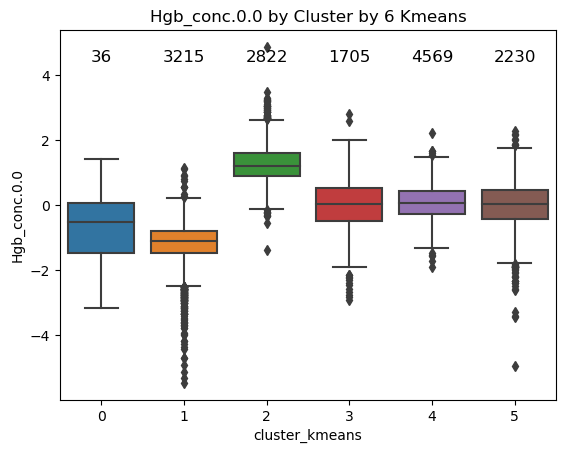

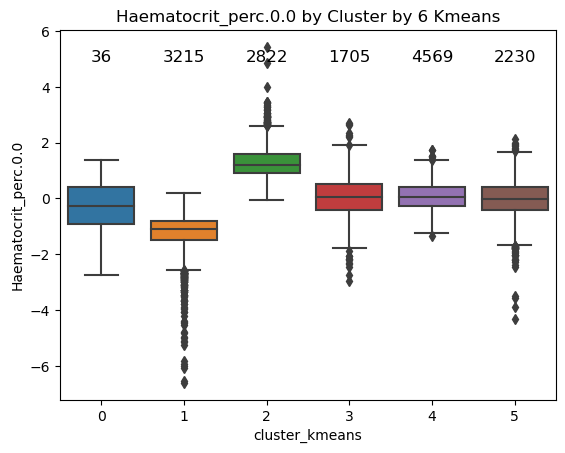

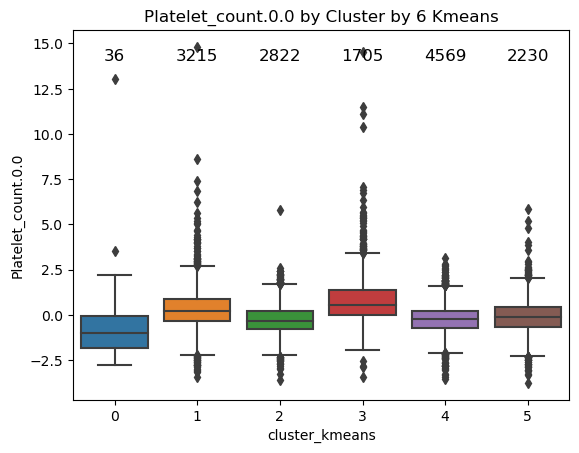

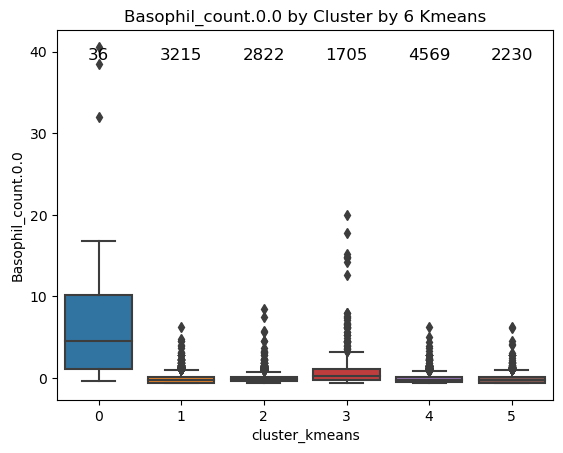

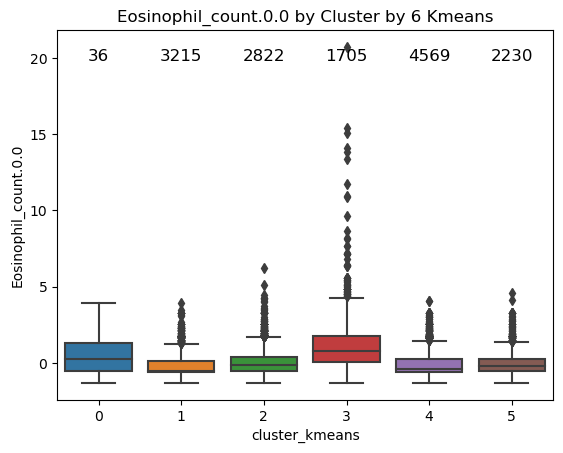

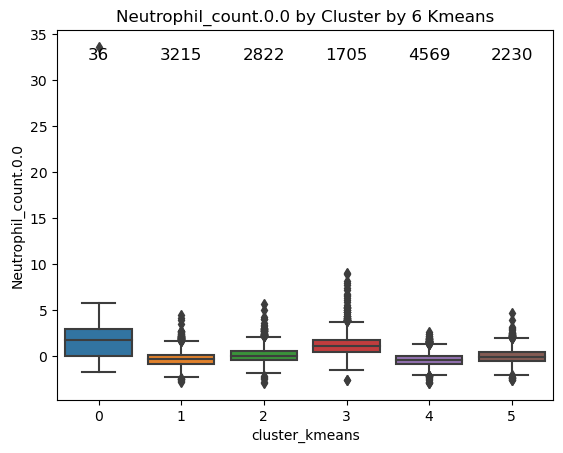

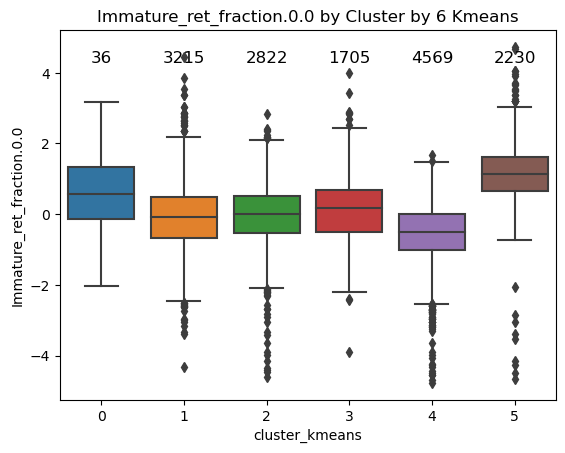

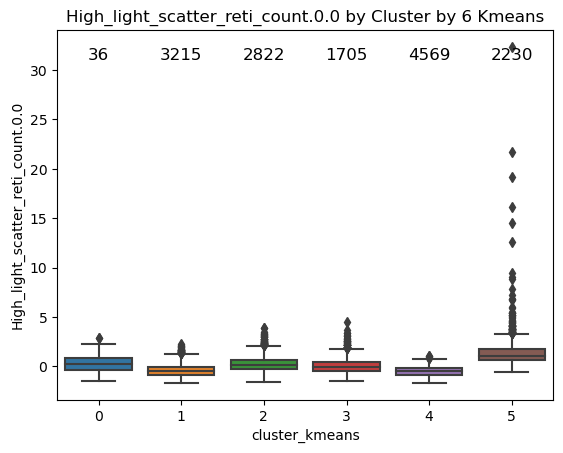

In [22]:
# list of columns to create box plots for
columns = ['Monocyte_count.0.0', 'Reti_count.0.0', 'WBC_count.0.0', 'RBC_count.0.0', 'Hgb_conc.0.0',
           'Haematocrit_perc.0.0', 'Platelet_count.0.0', 'Basophil_count.0.0', 'Eosinophil_count.0.0',
           'Neutrophil_count.0.0', 'Immature_ret_fraction.0.0', 'High_light_scatter_reti_count.0.0']

# loop through each column and create a box plot with total counts
for col in columns:
    # create the box plot
    sns.boxplot(x='cluster_kmeans', y=col, data=df_6Kmeans)
    plt.title(f"{col} by Cluster by 6 Kmeans")

    # get the counts for each cluster
    counts = df_6Kmeans.groupby('cluster_kmeans').size().reset_index(name='counts')

    # annotate the plot with the counts
    for i, row in counts.iterrows():
        plt.text(row['cluster_kmeans'], df_6Kmeans[col].max() - 0.1, f"{row['counts']}", 
                 fontsize=12, color='black', ha='center', va='top')

    # show the plot
    plt.show()


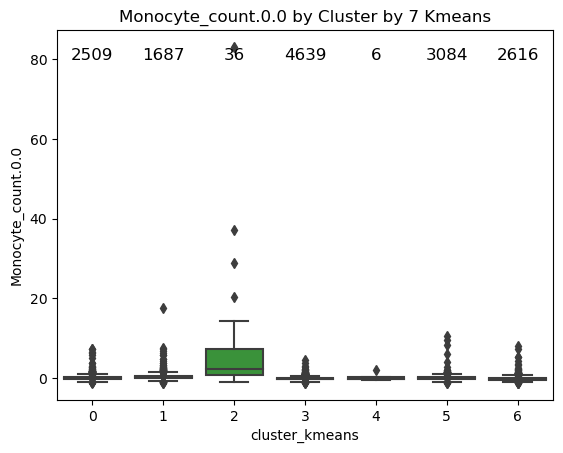

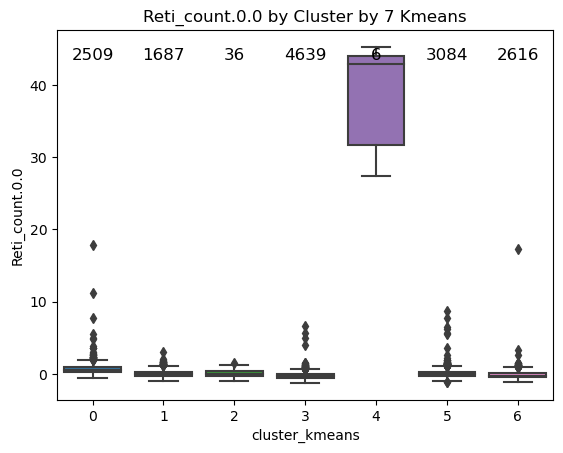

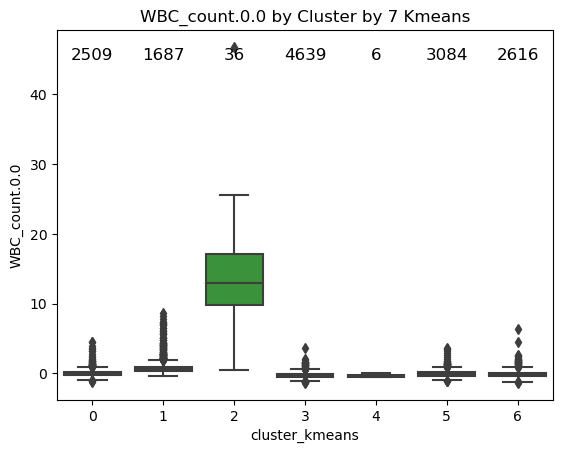

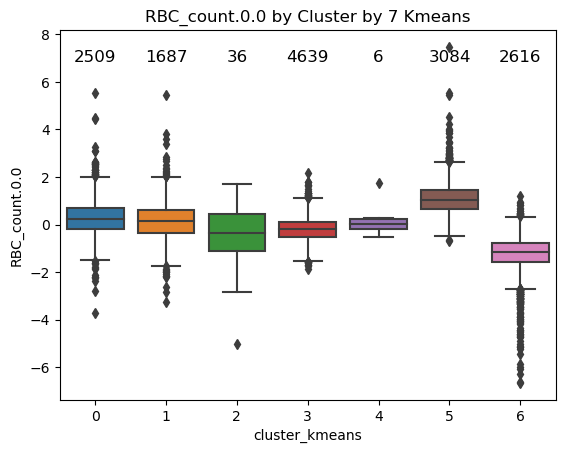

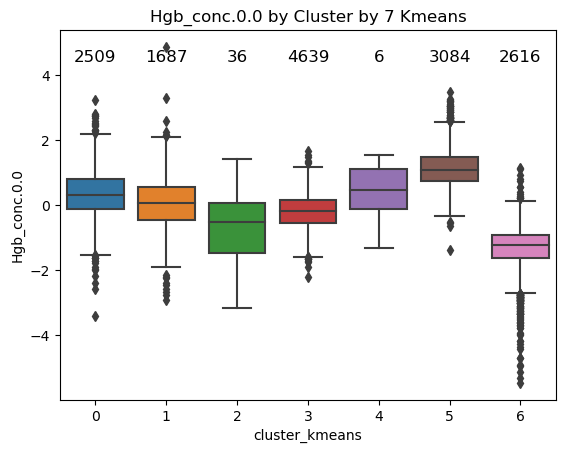

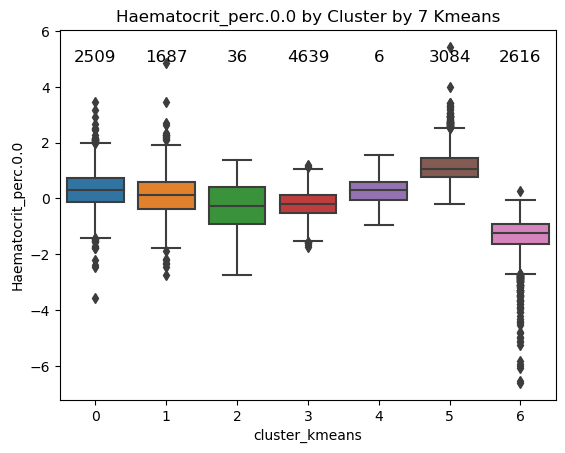

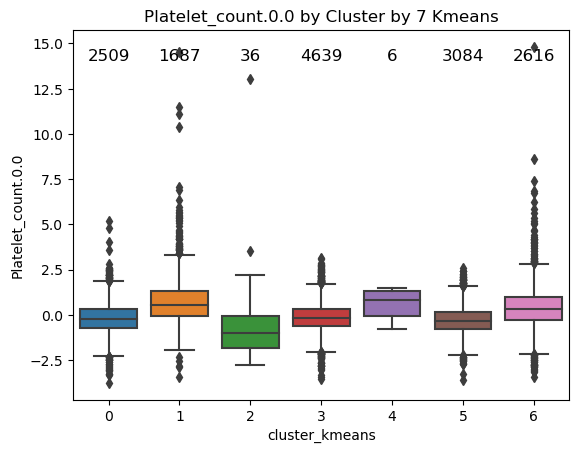

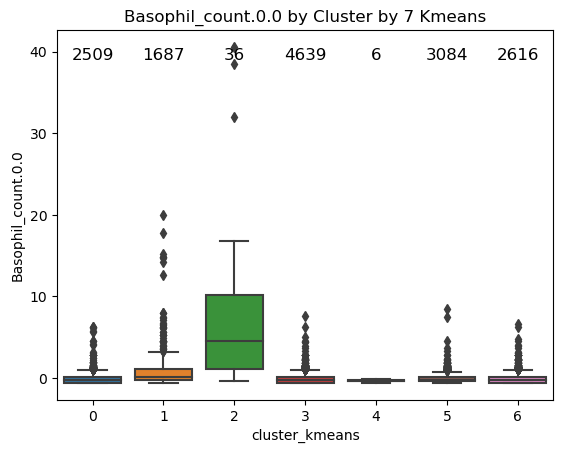

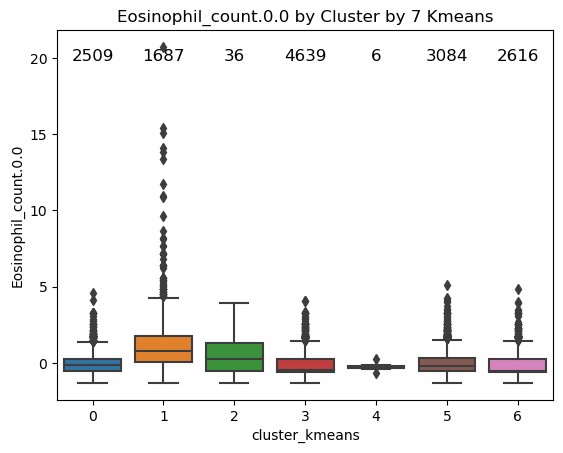

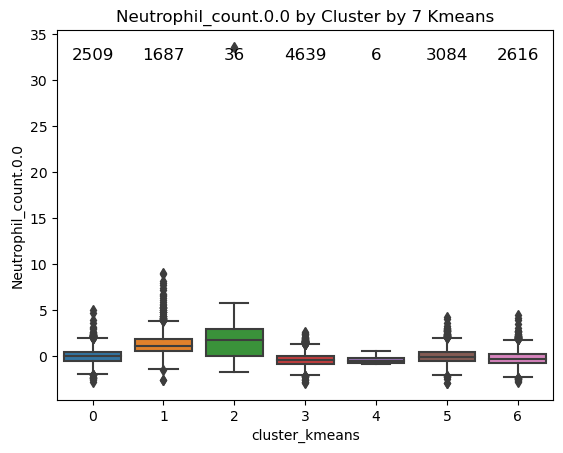

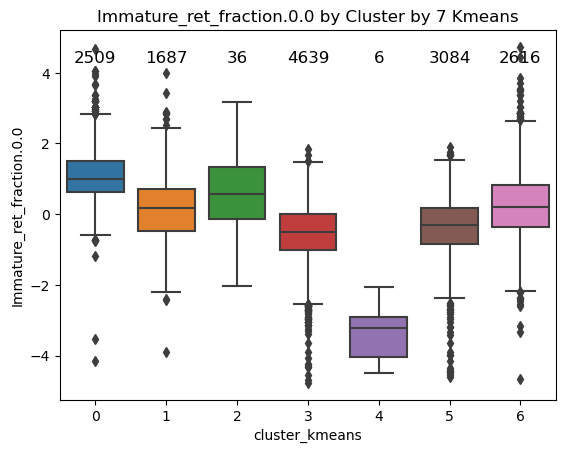

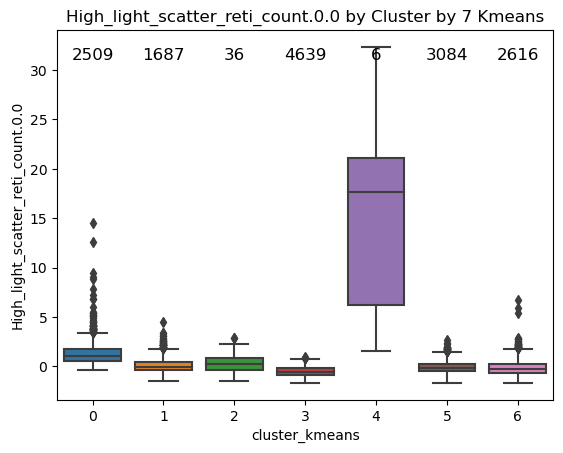

In [20]:
# list of columns to create box plots for
columns = ['Monocyte_count.0.0', 'Reti_count.0.0', 'WBC_count.0.0', 'RBC_count.0.0', 'Hgb_conc.0.0',
           'Haematocrit_perc.0.0', 'Platelet_count.0.0', 'Basophil_count.0.0', 'Eosinophil_count.0.0',
           'Neutrophil_count.0.0', 'Immature_ret_fraction.0.0', 'High_light_scatter_reti_count.0.0']

# loop through each column and create a box plot with total counts
for col in columns:
    # create the box plot
    sns.boxplot(x='cluster_kmeans', y=col, data=df_7Kmeans)
    plt.title(f"{col} by Cluster by 7 Kmeans")

    # get the counts for each cluster
    counts = df_7Kmeans.groupby('cluster_kmeans').size().reset_index(name='counts')

    # annotate the plot with the counts
    for i, row in counts.iterrows():
        plt.text(row['cluster_kmeans'], df_7Kmeans[col].max() - 0.1, f"{row['counts']}", 
                 fontsize=12, color='black', ha='center', va='top')

    # show the plot
    plt.show()

In [21]:
max_monocyte_count = df_6Kmeans['Monocyte_count.0.0'].max()
print("Maximum Monocyte count:", max_monocyte_count)


Maximum Monocyte count: 83.12181747393018
